In [1]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)

2.0.1
0.15.2


Number of images in dataset: 2975
<class 'PIL.PngImagePlugin.PngImageFile'>


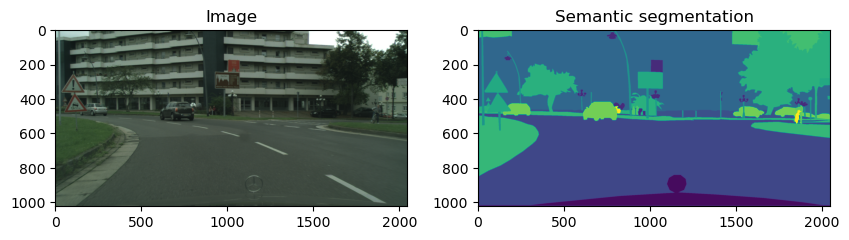

In [4]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import os
# Define a transform to convert the PIL images to tensors
transform = transforms.ToTensor()

# Specify the path to your Cityscapes dataset
# C:\Users\abjaw\Documents\GitHub\local-attention-model\data\CityScapes\gtFine_trainvaltest\gtFine
path_to_cityscapes_dataset = r"c:\Users\abjaw\Documents\GitHub\local-attention-model\data\Cityscapes"

# Load the Cityscapes dataset
dataset = datasets.Cityscapes(
    path_to_cityscapes_dataset, 
    split='train', 
    mode='fine', 
    target_type='semantic',
    transform=transform
)

print("Number of images in dataset:", len(dataset))

# Load the first image and its semantic segmentation mask
image, mask = dataset[0]

print(type(mask))
# Display the image
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(image.permute(1, 2, 0))  # PyTorch tensors have shape (C, H, W) and we need to change it to (H, W, C)
plt.title('Image')

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title('Semantic segmentation')

plt.show()


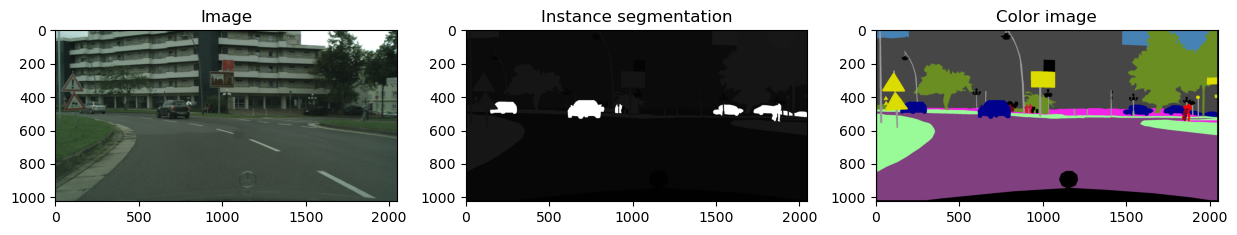

poly dict_keys(['imgHeight', 'imgWidth', 'objects'])
label road
polygon [[0, 769], [290, 574], [93, 528], [0, 524], [0, 448], [0, 448], [210, 453], [511, 451], [782, 459], [892, 495], [943, 498], [1044, 471], [1490, 486], [1880, 519], [1922, 512], [1975, 522], [2047, 524], [2047, 570], [1668, 553], [2047, 597], [2047, 1023], [892, 1023], [0, 1023]]
label sidewalk
polygon [[2047, 532], [1911, 537], [1828, 540], [1782, 540], [1794, 552], [2047, 564]]
label car
polygon [[806, 503], [803, 524], [796, 528], [785, 528], [778, 527], [776, 520], [771, 520], [768, 515], [732, 515], [728, 523], [722, 523], [715, 524], [714, 523], [711, 520], [709, 517], [706, 517], [702, 520], [697, 529], [690, 532], [681, 532], [678, 529], [674, 527], [671, 517], [635, 514], [632, 525], [615, 526], [611, 521], [609, 483], [620, 464], [629, 459], [625, 453], [629, 450], [634, 450], [639, 455], [644, 456], [644, 453], [643, 450], [658, 429], [672, 422], [674, 420], [766, 420], [780, 430], [789, 447], [793, 453], 

In [3]:
from torchvision import datasets
import matplotlib.pyplot as plt

# Load the Cityscapes dataset
dataset = datasets.Cityscapes(path_to_cityscapes_dataset, 
                              split='train', 
                              mode='fine',
                              target_type=['instance', 'color', 'polygon'])

# Load the first image and its targets
img, (inst, col, poly) = dataset[0]

# Display the image and the targets
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Image')

plt.subplot(1, 3, 2)
plt.imshow(inst)
plt.title('Instance segmentation')

plt.subplot(1, 3, 3)
plt.imshow(col)
plt.title('Color image')

plt.show()

print('poly', poly.keys())

for object in poly['objects']:
    print('label', object['label'])
    print('polygon', object['polygon'])
    # Print the first polygon annotation
    # for obj in poly['objects'][:1]:  # Just print the first object to not overwhelm the output
    #     print('obj', obj)


In [13]:
from collections import Counter
import numpy as np

# Initialize a Counter object
counter = Counter()

# Load the first image and its targets
for data in dataset:
    img, (inst, col, poly) = data
    for object in poly['objects']:
        # Update the counter with the object id
        counter.update([object['label']])


# Display the distribution of objects
plt.figure(figsize=(10, 5))
plt.bar(counter.keys(), counter.values())
plt.title('Distribution of Objects in the Dataset')
plt.xlabel('Object ID')
plt.ylabel('Count')
plt.show()


In [ ]:
# dataset = datasets.Cityscapes('./data/Cityscapes', split='train', mode='fine',
#                                  target_type='semantic')

# img, smnt = dataset[0]
import glob
mode = "fine"
root = r"c:\Users\abjaw\Documents\GitHub\local-attention-model\data\Cityscapes"

split = "train"

mode = "gtFine" if mode == "fine" else "gtCoarse"
images_dir = os.path.join(root, "leftImg8bit", split)
targets_dir = os.path.join(root, mode, split)


